In [1]:
%load_ext autoreload
%load_ext line_profiler
%autoreload 2

In [2]:
import csv
import pandas as pd
import numpy as np
from packer import Packer
import matplotlib.pyplot as plt
from tqdm import tqdm


In [3]:
df = pd.read_csv('dataset.csv', sep=',')
print(df.head(22))

    Order_ID  Product_ID  Quantity   L   W
0          1           0         5  29  19
1          1           1         5  29  19
2          1           2        10  29  19
3          1           3         4  29  19
4          1           4         6  29  19
5          1           5        10  29  19
6          1           6         2  39  26
7          1           7         2  39  26
8          1           8         2  46  15
9          1           9         2  46  15
10         1          10         1  40  26
11         1          11         1  40  26
12         1          12         2  40  26
13         1          13         2  40  26
14         1          14         1  40  26
15         1          15         1  40  26
16         1          16         1  32  21
17         1          17         1  32  21
18         1          18         1  32  21
19         1          19         1  32  21
20         2           0         4  39  26
21         2           1         2  39  26


In [4]:
results = []
item_results = []
for order_id, order in tqdm(df.groupby("Order_ID")):
    packer = Packer(order)

    packer.pack()

    liquid_filling = (order["Quantity"] * order["L"] * order["W"]).sum() / (100*120)
    amount_of_layers = len(packer.packed_items.layers)
    results.append([order_id, liquid_filling, amount_of_layers])

    for layer_index, layer in packer.packed_items.layers.items():
        for x,y,shape in layer:
            item_results.append(["Order_ID",layer_index,shape.id,x,y,shape.w,shape.h,shape.q])


results_df = pd.DataFrame(results, columns=["Order_ID", "Liquid_Filling", "Amount_of_Layers"])
item_results = pd.DataFrame(item_results, columns=["Order_ID", "Product"])
print(results_df["Amount_of_Layers"].sum())



100%|██████████| 2361/2361 [00:22<00:00, 103.71it/s]

10420


In [7]:
print(packer.packed_items.layers)

{0: [[0, 0, (84, 72, 12, 10)], [84, 0, (36, 84, 6, 8)], [0, 72, (68, 26, 4, 6)], [70, 84, (50, 16, 2, 11)]], 1: [[0, 0, (70, 69, 6, 14)], [0, 69, (102, 26, 6, 6)], [102, 44, (18, 56, 2, 7)], [93, 0, (27, 40, 1, 3)], [70, 40, (32, 25, 2, 12)], [70, 0, (23, 35, 1, 13)]], 2: [[0, 0, (70, 69, 6, 19)], [70, 0, (46, 70, 4, 18)], [0, 69, (70, 23, 2, 17)], [70, 70, (40, 27, 1, 4)]], 3: [[0, 0, (18, 56, 2, 9)], [0, 56, (52, 17, 2, 5)], [0, 73, (35, 23, 1, 15)], [35, 73, (35, 23, 1, 16)], [52, 38, (23, 35, 1, 20)], [70, 73, (32, 21, 1, 1)], [102, 64, (18, 36, 2, 21)], [18, 35, (33, 21, 1, 0)], [75, 41, (21, 32, 1, 2)], [96, 32, (21, 32, 1, 22)], [75, 9, (21, 32, 1, 23)]]}


      Order_ID  Liquid_Filling  Amount_of_Layers     Error
1333      1410        6.084000                 8  1.916000
328        342        7.186000                 9  1.814000
1557      1647        9.224250                11  1.775750
849        894        6.298583                 8  1.701417
1127      1188        6.303917                 8  1.696083
461        480        6.331167                 8  1.668833
1464      1552        6.343500                 8  1.656500
144        150        5.380500                 7  1.619500
1029      1082        8.381333                10  1.618667
1973      2084        4.381583                 6  1.618417
10420
1963.6917500000002


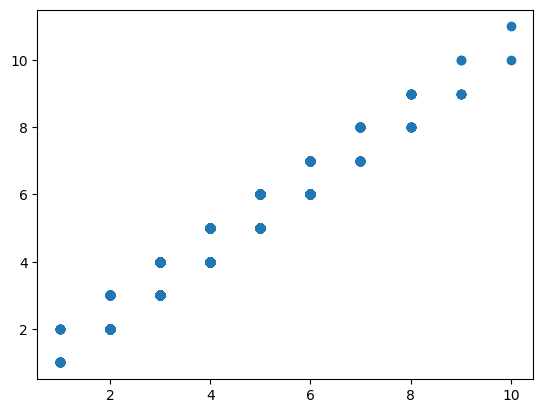

In [5]:
results_df["Error"] = results_df["Amount_of_Layers"] - results_df["Liquid_Filling"]
results_df.sort_values(by=["Error"], ascending=False, inplace=True)
print(results_df.head(10))
print(results_df["Amount_of_Layers"].sum())
print(results_df["Error"].sum())
plt.scatter(np.ceil(results_df["Liquid_Filling"]), results_df["Amount_of_Layers"])
plt.show()


In [6]:
# interesting_orders = [1,2213,2421]

custom_order = [[9999,0,4,33,21],[9999,1,1,33,21],[9999,2,5,35,23],[9999,3,1,35,23],[9999,4,1,33,22],[9999,5,2,33,22]]
custom_order = pd.DataFrame(custom_order, columns=["Order_ID", "Product_ID", "Quantity", "L", "W"])
interesting_orders = [342]

Order ID:  342
      Order_ID  Product_ID  Quantity   L   W
6677       342           0         2  38  25
6678       342           1         6  38  25
6679       342           2         2  38  25
6680       342           3         2  38  25
6681       342           4         2  38  25
6682       342           5        13  35  23
6683       342           6        13  35  23
6684       342           7         6  35  23
6685       342           8         4  35  23
6686       342           9         3  35  23
6687       342          10         4  35  23
6688       342          11         8  35  23
6689       342          12         6  35  23
6690       342          13         3  35  23
6691       342          14        15  33  22
6692       342          15        15  33  22
6693       342          16         2  46  31
Amount of layers:  9
Liquid filling:  7.186


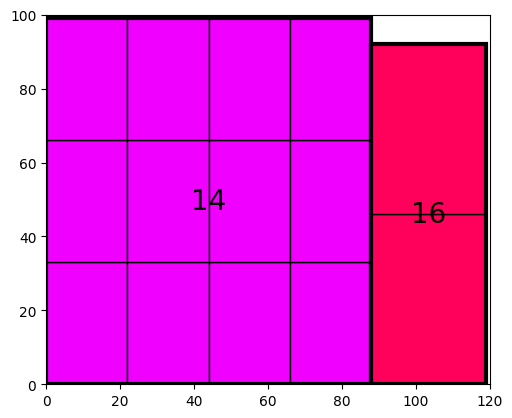

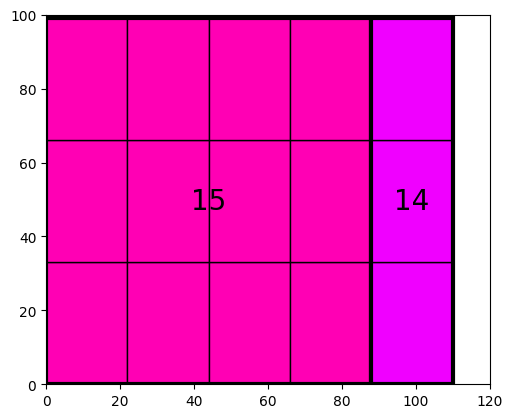

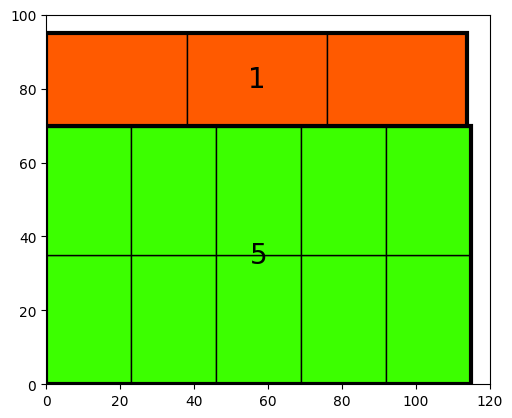

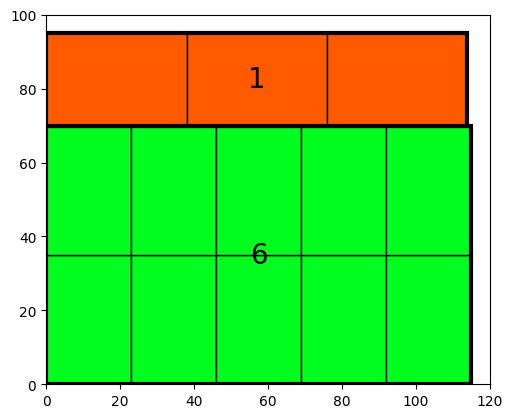

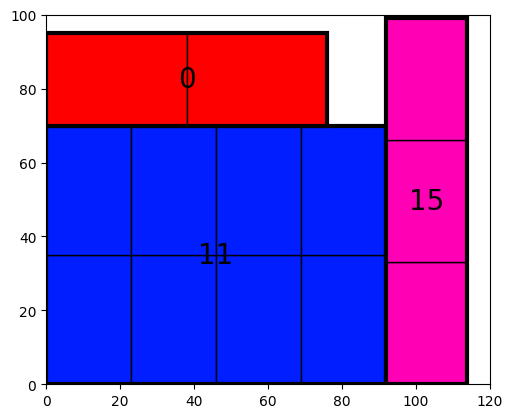

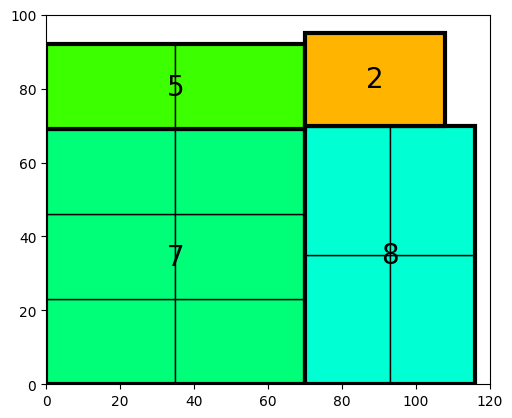

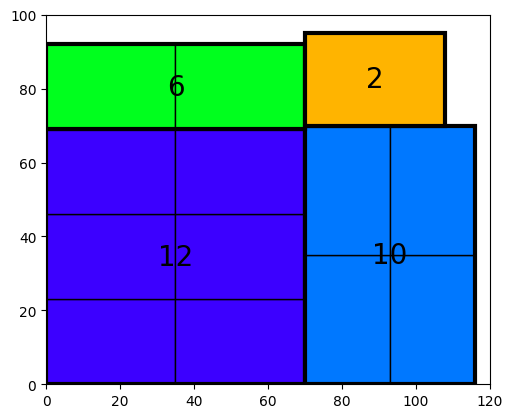

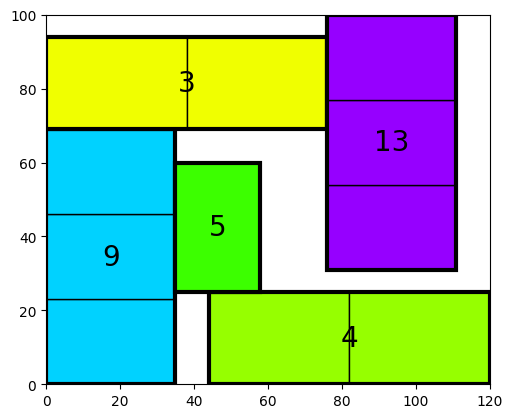

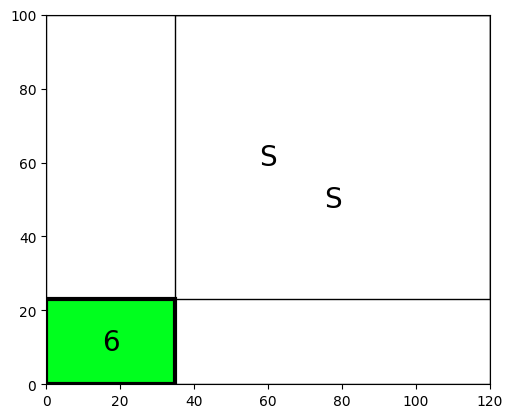

In [7]:
order_ids = interesting_orders

for order_id in order_ids:
    order = df[df["Order_ID"] == order_id]
    print("Order ID: ", order_id)
    print(order)
    liquid_filling = (order["Quantity"] * order["L"] * order["W"]).sum() / (100*120)
    packer = Packer(order)
    packer.pack()

    print("Amount of layers: ", len(packer.packed_items.layers))
    print("Liquid filling: ", liquid_filling)
    packer.visualise()

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.00833333 0.00833333 0.00833333 ... 0.00833333 0.00833333 0.00833333]
 [0.01666667 0.01666667 0.01666667 ... 0.01666667 0.01666667 0.01666667]
 ...
 [0.95       0.95       0.95       ... 0.95       0.95       0.95      ]
 [0.975      0.975      0.975      ... 0.975      0.975      0.975     ]
 [1.         1.         1.         ... 1.         1.         1.        ]]
1.0


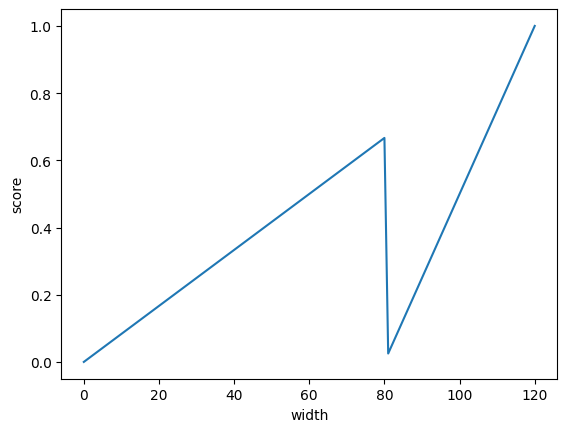

In [15]:
space_width = 120
space_height = 100

shapes = np.array([[40,60],[50,50],[60,40]])

scores = np.zeros((space_width+1, space_height+1))

for x in range(space_width+1):
    for y in range(space_height+1):
        # space1_w = shape_width - x; space1_h = shape_height; space2_w = x; space2_h = shape_height - y

        min_width = np.min(shapes[:,0])
        min_height = np.min(shapes[:,1])

        width_cutoff = space_width - min_width
        height_cutoff = space_height - min_height

        score1_w = (x / space_width) * (x <= width_cutoff)
        score1_h = (y / space_height) * (y <= height_cutoff)

        score2_w = (((x - width_cutoff)*space_height / ((space_width - width_cutoff)*space_height))) * (x > width_cutoff)
        score2_h = (((y - height_cutoff) / (space_height - height_cutoff))) * (y > height_cutoff)

        # p = 4
        # score2_w = 1/(min_width**p) * (x - width_cutoff)**p * (x > width_cutoff)
        # score2_h = 1/(min_height**p) * (y - height_cutoff)**p * (y > height_cutoff)

        # a = 0

        # score2_w = ((1 - a*width_cutoff/space_width)/min_width * x + (width_cutoff * (a - 1))/min_width) * (x > width_cutoff)
        # score2_h = ((1 - a*height_cutoff/space_height)/min_height * y + (height_cutoff * (a - 1))/min_height) * (y > height_cutoff)


        width_score = score1_w + score2_w
        height_score = score1_h + score2_h
        scores[x,y] = width_score

print(scores)
print(np.max(scores))
# plt.imshow(scores)
# plt.ylabel("height")
# plt.xlabel("width")

ax = plt.plot(scores[:,0])
plt.ylabel("score")
plt.xlabel("width")


plt.show()